In [1]:
import numpy as np
import pandas as pd
import Strategies 
import Strategy_Analysis_Tool 
from binance.client import Client
from matplotlib import pyplot as plt

In [2]:
# Get data
symbol = "BTCUSDT"
timeFrame = "1h"
startDate = "2017-01-01"
endDate = "2022-08-28"
client = Client()
bars = client.get_historical_klines(symbol=symbol,interval=timeFrame,start_str=startDate, end_str = endDate)
df = pd.DataFrame(bars[:],columns=["timestamp","open","high","low","close","volume", "close_time", "quote_asset_volume", "number_of_trade", "TBB", "TBQ", "ignore"])
df["date"]=pd.to_datetime(df["timestamp"],unit="ms").astype(str)
df = df.drop(["timestamp", "close_time", "quote_asset_volume", "number_of_trade", "TBB", "TBQ", "ignore"], axis=1)
df["open"] = pd.to_numeric(df["open"])
df["high"] = pd.to_numeric(df["high"])
df["low"] = pd.to_numeric(df["low"])
df["close"] = pd.to_numeric(df["close"])
df["volume"] = pd.to_numeric(df["volume"])
df

,open,high,low,close,volume,date
0,4261.48,4313.62,4261.32,4308.83,47.181009,2017-08-17 04:00:00
1,4308.83,4328.69,4291.37,4315.32,23.234916,2017-08-17 05:00:00
2,4330.29,4345.45,4309.37,4324.35,7.229691,2017-08-17 06:00:00
3,4316.62,4349.99,4287.41,4349.99,4.443249,2017-08-17 07:00:00
4,4333.32,4377.85,4333.32,4360.69,0.972807,2017-08-17 08:00:00
...,...,...,...,...,...,...
43953,20018.00,20040.40,19941.83,20007.99,4374.049180,2022-08-27 20:00:00
43954,20007.99,20029.84,19870.01,19873.06,2779.324280,2022-08-27 21:00:00
43955,19874.25,20103.57,19858.43,20020.08,8501.926530,2022-08-27 22:00:00
43956,20021.35,20087.65,19992.55,20037.60,5025.547650,2022-08-27 23:00:00


In [3]:
# Grid strategy
grid_parameters = {
    "name":"grid",                                    ## str
    "start_money" : 1000.0,                           ## float    
    "start_storage" : 0.0,                            ## float
    "trading_fee_rate" : 0.002,                       ## float
    "unit" : 0.005,                                   ## float
    "grid_number" : 20,                               ## int  
    "equal_Diff_or_Ratio" : "RATIO",                  ## "DIFF", "RATIO"
    "trading_logistic":"both",                        ## "long", "short", "both"
    "initial_setup":{"type":"None", "portion":0.0},   ## "type": "long", "short" or "None". "portion" : float
    "lowest_price" : 1.0,                             ## float
    "highest_price" : 60000.0                         ## float
}
myGrid = Strategies.Grid(grid_parameters)
# Buy and hold
buy_and_hold_parameters = {
    "name":"buy and hold",                            ## str
    "start_money" : 1000.0,                           ## float    
    "start_storage" : 0.0,                            ## float
    "trading_fee_rate" : 0.002,                       ## float
    "unit" : 0.0001,                                  ## float
}
buy_and_hodl = Strategies.Buy_and_Hold(buy_and_hold_parameters)

*--------------------------------*
strategy: grid
expected return: 7.761034560884977
sharpe ratio: 0.22050978590443993
*--------------------------------*
strategy: buy and hold
expected return: 121.7750752080959
sharpe ratio: 0.6863524542570872


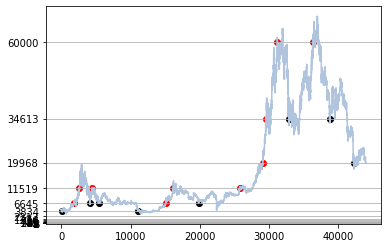

*--------------------------------*
strategy: grid
trading count: 18
profit: 4.204703949015425
MDD: 0.39898075507949926


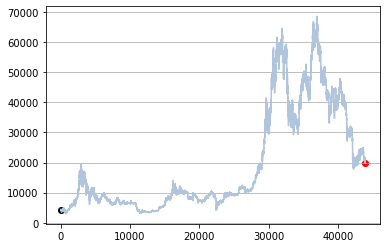

*--------------------------------*
strategy: buy and hold
trading count: 2
profit: 369.1365441114355
MDD: 0.957469866475196


In [4]:
sharpe_ratio, expected_return = Strategy_Analysis_Tool.Analysis_tool.Shape_Ratio(myGrid, df, 0.02, window_size=10000, window_off=1000)
print("*--------------------------------*")
print("strategy:", myGrid.name)
print("expected return:", expected_return * 100)
print("sharpe ratio:", sharpe_ratio)
sharpe_ratio, expected_return = Strategy_Analysis_Tool.Analysis_tool.Shape_Ratio(buy_and_hodl, df, 0.02, window_size=10000, window_off=1000)
print("*--------------------------------*")
print("strategy:", buy_and_hodl.name)
print("expected return:", expected_return * 100)
print("sharpe ratio:", sharpe_ratio)

profit, trading_count, buy_record, sell_record, MDD = myGrid.back_test(df)
print("*--------------------------------*")
print("strategy:", myGrid.name)
print("trading count:", trading_count)
print("profit:", profit * 100)
print("MDD:", MDD)
profit, trading_count, buy_record, sell_record, MDD = buy_and_hodl.back_test(df)
print("*--------------------------------*")
print("strategy:", buy_and_hodl.name)
print("trading count:", trading_count)
print("profit:", profit * 100)
print("MDD:", MDD)

## Brute Force and find the best parameters

In [5]:
# Buy and hold
buy_and_hold_parameters = {
    "name":"buy and hold",                            ## str
    "start_money" : 1000.0,                           ## float    
    "start_storage" : 0.0,                            ## float
    "trading_fee_rate" : 0.002,                       ## float
    "unit" : 0.0001,                                  ## float
}
buy_and_hodl = Strategies.Buy_and_Hold(buy_and_hold_parameters)
sharpe_ratio, expected_return = Strategy_Analysis_Tool.Analysis_tool.Shape_Ratio(buy_and_hodl, df, 0.02, window_size=10000, window_off=1000)
print("*--------------------------------*")
print("strategy:", buy_and_hodl.name)
print("expected return:", expected_return * 100)
print("sharpe ratio:", sharpe_ratio)

*--------------------------------*
strategy: buy and hold
expected return: 121.7750752080959
sharpe ratio: 0.6863524542570872


In [6]:
grid_parameters = {
    "name":"grid",                                    ## str
    "start_money" : 1000.0,                           ## float    
    "start_storage" : 0.0,                            ## float
    "trading_fee_rate" : 0.002,                       ## float
    "unit" : 0.005,                                   ## float
    "grid_number" : 20,                               ## int  
    "equal_Diff_or_Ratio" : "RATIO",                  ## "DIFF", "RATIO"
    "trading_logistic":"both",                        ## "long", "short", "both"
    "initial_setup":{"type":"None", "portion":0.0},   ## "type": "long", "short" or "None". "portion" : float
    "lowest_price" : 1.0,                             ## float
    "highest_price" : 60000.0                         ## float
}

index = 0
sharpe = []
expected = []
for unit in range(1, 10501, 500):
    for grid_number in range(20, 40, 2):
        for lowest_price in range(1, 10000, 2000):
            for highest_price in range(40000, 60000, 2000):
                grid_parameters["unit"] = unit/100000
                grid_parameters["grid_number"] = grid_number
                grid_parameters["lowest_price"] = lowest_price
                grid_parameters["highest_price"] = highest_price

                myGrid = Strategies.Grid(grid_parameters)
                sharpe_ratio, expected_return = Strategy_Analysis_Tool.Analysis_tool.Shape_Ratio(myGrid, df, 0.02, window_size=10000, window_off=1000)
                print("*--------------------------------*")
                print("index:", index)
                print("unit:", unit)
                print("grid number:", grid_number)
                print("lowest price:", lowest_price)
                print("highest price:", highest_price)
                print("strategy:", myGrid.name)
                print("expected return:", expected_return * 100)
                print("sharpe ratio:", sharpe_ratio)
                sharpe.append(sharpe_ratio)
                expected.append(expected_return)
                index += 1

*--------------------------------*
index: 0
unit: 1
grid number: 20
lowest price: 1
highest price: 40000
strategy: buy and hold
expected return: 0.027807714000345766
sharpe ratio: -32.65642911910087
*--------------------------------*
index: 0
unit: 1
grid number: 20
lowest price: 1
highest price: 42000
strategy: buy and hold
expected return: 0.027488246827290907
sharpe ratio: -33.38327645440181
*--------------------------------*
index: 0
unit: 1
grid number: 20
lowest price: 1
highest price: 44000
strategy: buy and hold
expected return: 0.026283789674093158
sharpe ratio: -33.93899136609739
*--------------------------------*
index: 0
unit: 1
grid number: 20
lowest price: 1
highest price: 46000
strategy: buy and hold
expected return: 0.02544836088902216
sharpe ratio: -34.039274282786465
*--------------------------------*
index: 0
unit: 1
grid number: 20
lowest price: 1
highest price: 48000
strategy: buy and hold
expected return: 0.025137501677098124
sharpe ratio: -34.908428094599984
*---

In [8]:
print(np.argmax(expected), np.argmax(sharpe))

3982 6510


In [83]:
index = 0
u = 0
for unit in range(1, 10501, 500):
    g = 0
    for grid_number in range(20, 40, 2):
        l = 0
        for lowest_price in range(1, 10000, 2000):
            h = 0
            for highest_price in range(40000, 60000, 2000):
                if (index == 3982 or index == 6510):
                    print(unit, grid_number, lowest_price, highest_price)
                    print(u, g, l, h)
                index += 1
                h += 1
            l += 1
        g += 1
    u += 1

3501 38 6001 44000
7 9 3 2
6501 20 2001 40000
13 0 1 0


In [66]:
grid_parameters = {
    "name":"grid",                                    ## str
    "start_money" : 1000.0,                           ## float    
    "start_storage" : 0.0,                            ## float
    "trading_fee_rate" : 0.002,                       ## float
    "unit" : 0.005,                                   ## float
    "grid_number" : 20,                               ## int  
    "equal_Diff_or_Ratio" : "RATIO",                  ## "DIFF", "RATIO"
    "trading_logistic":"both",                        ## "long", "short", "both"
    "initial_setup":{"type":"None", "portion":0.0},   ## "type": "long", "short" or "None". "portion" : float
    "lowest_price" : 1.0,                             ## float
    "highest_price" : 60000.0                         ## float
}

grid_parameters["unit"] = 6501/100000
grid_parameters["grid_number"] = 20
grid_parameters["lowest_price"] = 2001
grid_parameters["highest_price"] = 40000

myGrid = Strategies.Grid(grid_parameters)
sharpe_ratio, expected_return = Strategy_Analysis_Tool.Analysis_tool.Shape_Ratio(myGrid, df, 0.02, window_size=10000, window_off=1000)
print("*--------------------------------*")
print("unit:", myGrid.unit)
print("grid number:", myGrid.grid_number)
print("lowest price:", myGrid.lowest_price)
print("highest price:", myGrid.highest_price)
print("strategy:", myGrid.name)
print("expected return:", expected_return * 100)
print("sharpe ratio:", sharpe_ratio)

*--------------------------------*
unit: 0.06501
grid number: 20
lowest price: 2001
highest price: 40000
strategy: grid
expected return: 342.4370802831899
sharpe ratio: 0.6681209308675267


In [13]:
Expected_Return = np.array(expected)
Sharpe_Ratio = np.array(sharpe)
R = Expected_Return.reshape([21, 10, 5, 10])
S = Sharpe_Ratio.reshape([21,10, 5, 10])

614.5862752204672


Text(0.5, 0, 'Expected Return (%)')

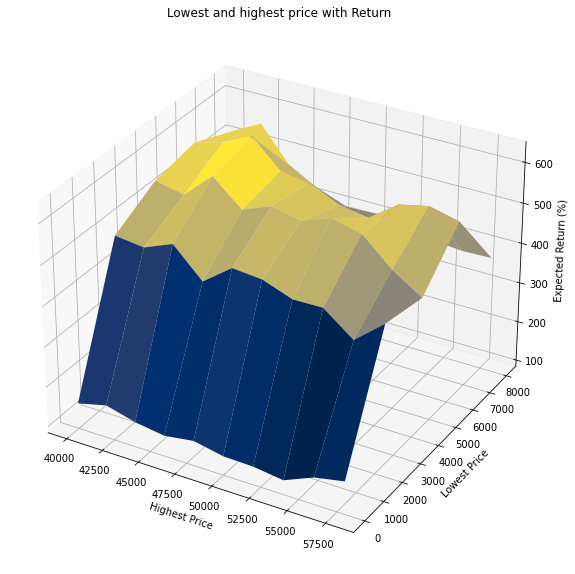

In [242]:
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt
 
low = list(range(1, 10000, 2000))
high = list(range(40000, 60000, 2000))
X, Y = np.meshgrid(low, high)

three_dim_R = R[7, 9, :, :]
Z = np.transpose(three_dim_R) * 100
print(np.max(Z))

fig = plt.figure(figsize=(12,10))
ax = plt.axes(projection ='3d')
ax.scatter(44000, 6001, np.max(Z))
ax.set_title('Lowest and highest price with Return')
surf = ax.plot_surface(Y, X, Z, cmap = plt.cm.cividis)
ax.set_xlabel("Highest Price")
ax.set_ylabel("Lowest Price")
ax.set_zlabel("Expected Return (%)")

614.5862752204672


Text(0.5, 0, 'Expected Return (%)')

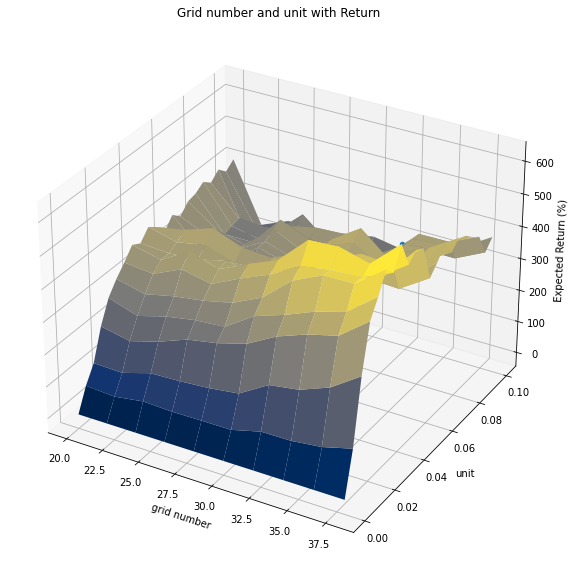

In [223]:
unit = list(range(1, 10501, 500))
grid_number = list(range(20, 40, 2))
X, Y = np.meshgrid(unit, grid_number)
X = np.array(X) / 100000

three_dim_R = R[:, :, 3, 2]
Z = np.transpose(three_dim_R) * 100
print(np.max(Z))

fig = plt.figure(figsize=(12,10))
ax = plt.axes(projection ='3d')
ax.scatter(38, 0.03501, np.max(Z))
ax.set_title('Grid number and unit with Return')
surf = ax.plot_surface(Y, X, Z, cmap = plt.cm.cividis)
ax.set_xlabel("grid number")
ax.set_ylabel("unit")
ax.set_zlabel("Expected Return (%)")

614.5862752204672


Text(0.5, 0, 'Expected Return (%)')

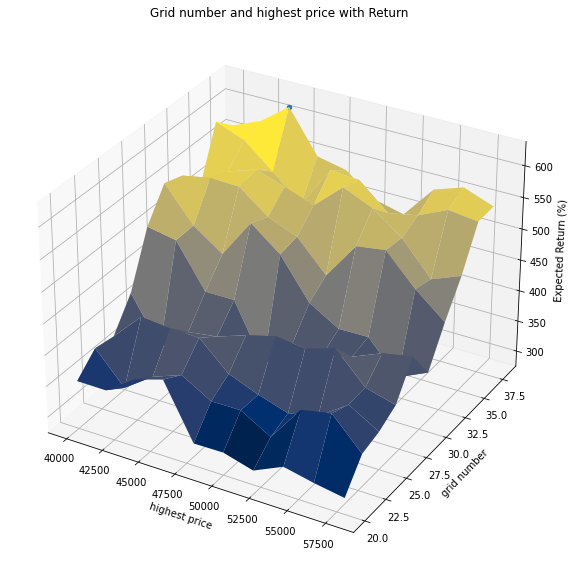

In [221]:
high = list(range(40000, 60000, 2000))
grid_number = list(range(20, 40, 2))
X, Y = np.meshgrid(high, grid_number)

three_dim_R = R[7, :, 3, :]
# Z = np.transpose(three_dim_R) * 100
Z = three_dim_R * 100
print(np.max(Z))

fig = plt.figure(figsize=(12,10))
ax = plt.axes(projection ='3d')
ax.set_title('Grid number and highest price with Return')
ax.scatter(44000, 38, np.max(Z))
surf = ax.plot_surface(X, Y, Z, cmap = plt.cm.cividis)
ax.set_xlabel("highest price")
ax.set_ylabel("grid number")
ax.set_zlabel("Expected Return (%)")

0.6681209308675267


Text(0.5, 0, 'Sharpe Ratio')

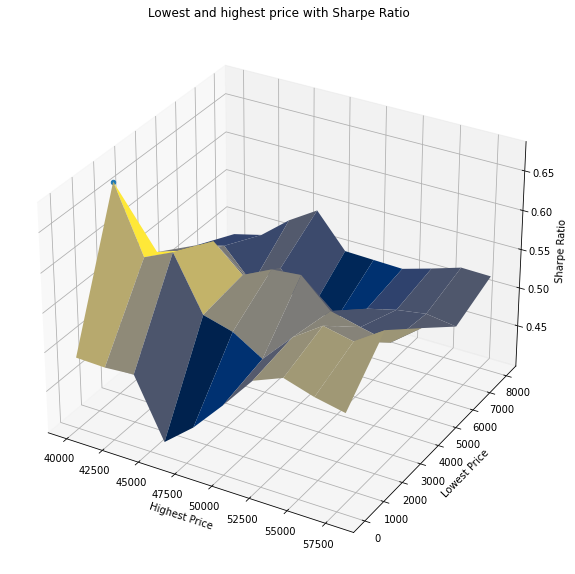

In [170]:
low = list(range(1, 10000, 2000))
high = list(range(40000, 60000, 2000))
X, Y = np.meshgrid(low, high)

three_dim_R = S[13, 0, :, :]
Z = np.transpose(three_dim_R)
print(np.max(Z))

fig = plt.figure(figsize=(12,10))
ax = plt.axes(projection ='3d')
ax.set_title('Lowest and highest price with Sharpe Ratio')
surf = ax.plot_surface(Y, X, Z, cmap = plt.cm.cividis)
ax.set_xlabel("Highest Price")
ax.set_ylabel("Lowest Price")
ax.scatter(40000, 2001, np.max(Z))
ax.set_zlabel("Sharpe Ratio")

0.6681209308675267


Text(0.5, 0, 'Sharpe Ratio')

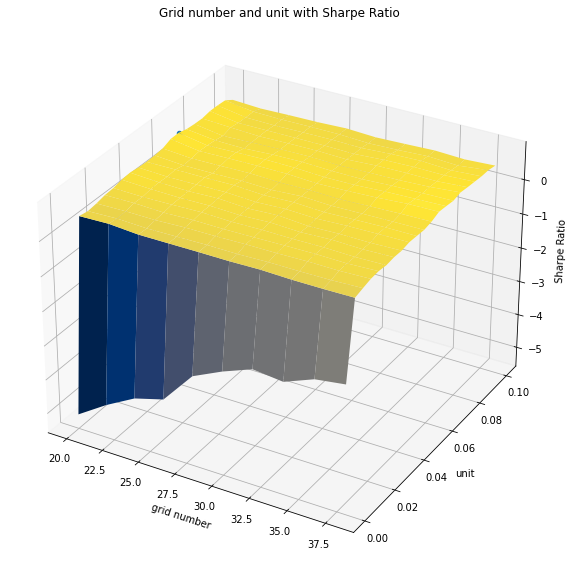

In [211]:
unit = list(range(1, 10501, 500))
grid_number = list(range(20, 40, 2))
X, Y = np.meshgrid(unit, grid_number)
X = np.array(X) / 100000

three_dim_R = S[:, :, 1, 0]
Z = np.transpose(three_dim_R)
print(np.max(Z))


fig = plt.figure(figsize=(12,10))
ax = plt.axes(projection ='3d')
ax.scatter(20, 0.06501, np.max(Z))
ax.set_title('Grid number and unit with Sharpe Ratio')
surf = ax.plot_surface(Y, X, Z, cmap = plt.cm.cividis)
ax.set_xlabel("grid number")
ax.set_ylabel("unit")
ax.set_zlabel("Sharpe Ratio")

0.6681209308675267


Text(0.5, 0, 'Sharpe Ratio')

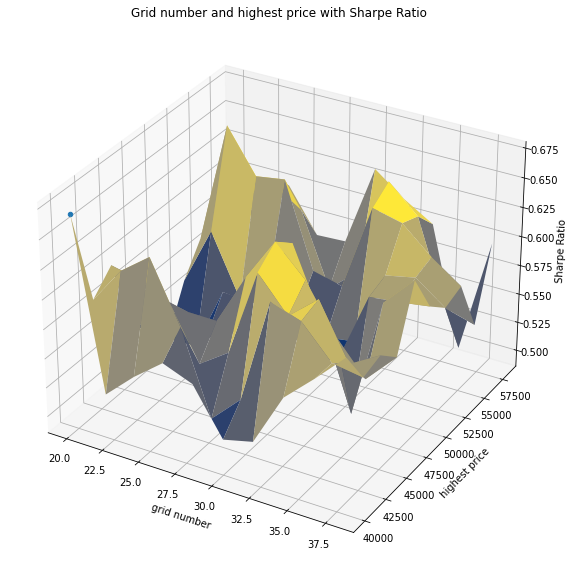

In [209]:
high = list(range(40000, 60000, 2000))
grid_number = list(range(20, 40, 2))
X, Y = np.meshgrid(high, grid_number)

three_dim_R = S[13, :, 1, :]
# Z = np.transpose(three_dim_R)
Z = three_dim_R
print(np.max(Z))

fig = plt.figure(figsize=(12,10))
ax = plt.axes(projection ='3d')
ax.set_title('Grid number and highest price with Sharpe Ratio')
surf = ax.plot_surface(Y, X, Z, cmap = plt.cm.cividis)
ax.scatter(20, 40000, np.max(Z))
ax.set_xlabel("grid number")
ax.set_ylabel("highest price")
ax.set_zlabel("Sharpe Ratio")